In [1]:
# Importing the libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


# loading the dataset

In [3]:
dataset=tf.keras.datasets.mnist.load_data()

In [4]:
(X_train,y_train),(X_test,y_test)=dataset

In [5]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

# visualizing the dataset

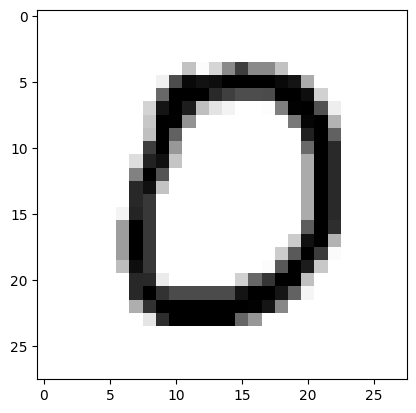

In [6]:
plt.imshow(X_test[10],cmap="binary")

# building the model

In [7]:
from tensorflow.keras import initializers
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu",kernel_initializer=initializers.HeNormal()))
model.add(tf.keras.layers.Dense(64,activation="relu",kernel_initializer=initializers.GlorotUniform()))
model.add(tf.keras.layers.Dense(32,activation="relu",kernel_initializer=initializers.HeNormal()))
model.add(tf.keras.layers.Dense(20,activation="relu",kernel_initializer=initializers.GlorotUniform()))
model.add(tf.keras.layers.Dense(10,activation="sigmoid",kernel_initializer=initializers.RandomNormal()))
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [8]:
history=model.fit(X_train,y_train,epochs=5,callbacks=tf.keras.callbacks.EarlyStopping(),validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 0.4160 - accuracy: 0.8801 - val_loss: 0.1819 - val_accuracy: 0.9456
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1791 - accuracy: 0.9479 - val_loss: 0.1592 - val_accuracy: 0.9540


In [9]:
model_history=model.evaluate(X_test,y_test)
print(model_history)

313/313 [==============================] - 1s 3ms/step - loss: 0.1602 - accuracy: 0.9563
[0.16018079221248627, 0.9563000202178955]


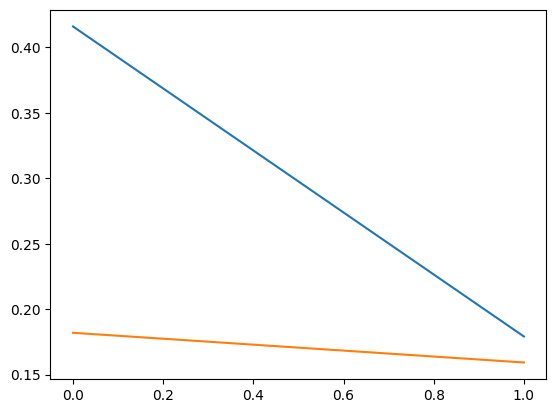

In [10]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [11]:
model.save("model.h5")

In [12]:
model=tf.keras.models.load_model("model.h5")

In [13]:
prediction=model.predict([X_test])

In [14]:
y_test[100]==np.argmax(prediction[100])

True

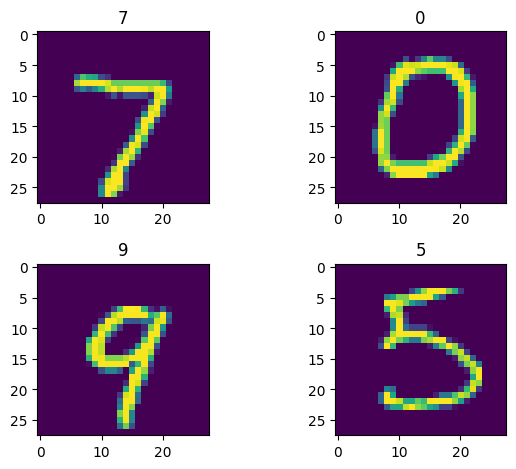

In [15]:
fig,ax=plt.subplots(2,2)

ax[0,0].imshow(X_test[0])
ax[0,0].set_title(np.argmax(prediction[0]))
ax[0,1].imshow(X_test[10])
ax[0,1].set_title(np.argmax(prediction[10]))
ax[1,0].imshow(X_test[12])
ax[1,0].set_title(np.argmax(prediction[12]))
ax[1,1].imshow(X_test[15])
ax[1,1].set_title(np.argmax(prediction[15]))

plt.tight_layout()
plt.show()